# TASK: TITANIC SURVIVAL PREDICTION

DOMAIN : DATA SCIENCE

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Collection and Processing

In [2]:
# Creating a DataFrame using CSV file
data=pd.read_csv("Titanic-Dataset.csv")

In [3]:
# print first five rows of the DataFrame
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# print the number of rows and columns
data.shape

(891, 12)

In [34]:
# print columns names of the DataFrame
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [6]:
# checking the null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling Null Values

In [7]:
#Drop the column Cabin from dataFrame
data=data.drop(columns=["Cabin","Name"],axis=1)

In [8]:
# Filling the missing values in 'Age' column by taking Mean.
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##  Statistical analysis

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Categorise the count of Survived and Not Survived people
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [13]:
# Categorise the count of male and female
data["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [14]:
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

## Data Visualization

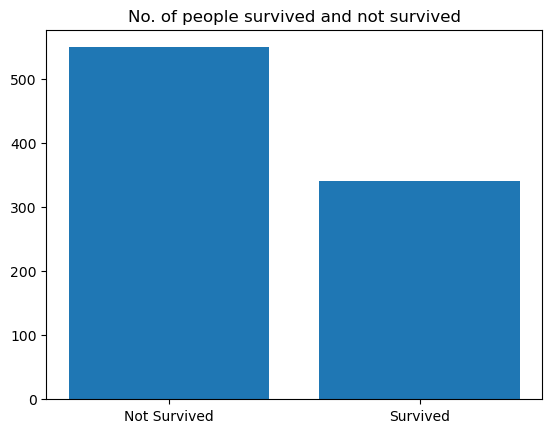

In [15]:
a=data["Survived"].value_counts()
x=["Not Survived","Survived"]
y=[a[i] for i in range(0,2)]
plt.bar(x,y)
plt.title("No. of people survived and not survived")
plt.show()

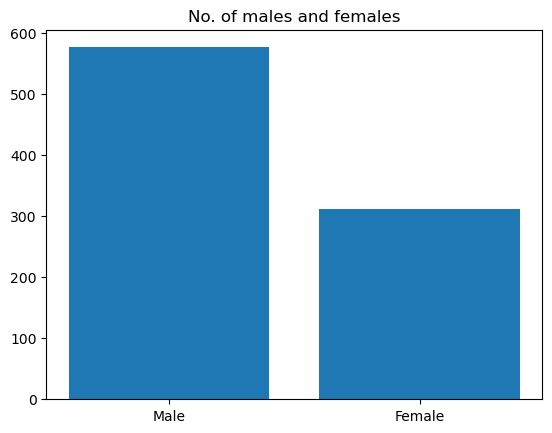

In [16]:
b=data["Sex"].value_counts()
x=["Male","Female"]
y=[b[i] for i in range(0,2)]
plt.bar(x,y)
plt.title("No. of males and females")
plt.show()

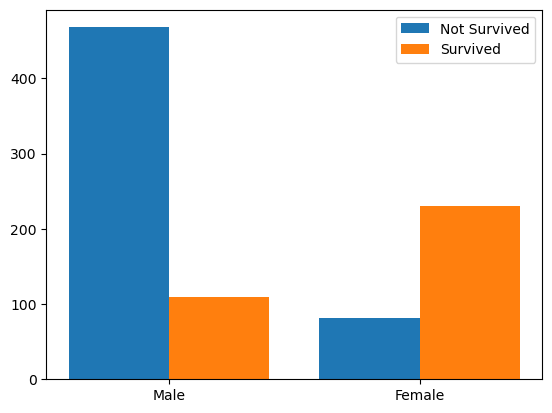

In [17]:
x=["Male","Female"]
c=data[data["Survived"]==0]["Sex"].value_counts()
d=data[data["Survived"]==1]["Sex"].value_counts()
y_male=[c[0],c[1]]
y_female=[d[1],d[0]]
x_axis = np.arange(len(x)) 
plt.bar(x_axis - 0.2,y_male, 0.4, label = 'Not Survived') 
plt.bar(x_axis + 0.2,y_female, 0.4, label = 'Survived') 
plt.xticks(x_axis, x)
plt.legend() 
plt.show() 

<Axes: xlabel='Pclass', ylabel='count'>

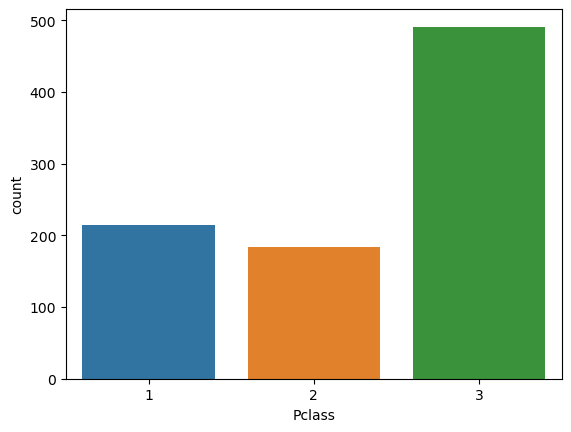

In [18]:
# creating a Countplot for the Pclass Column
sns.countplot(data =data,x ='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

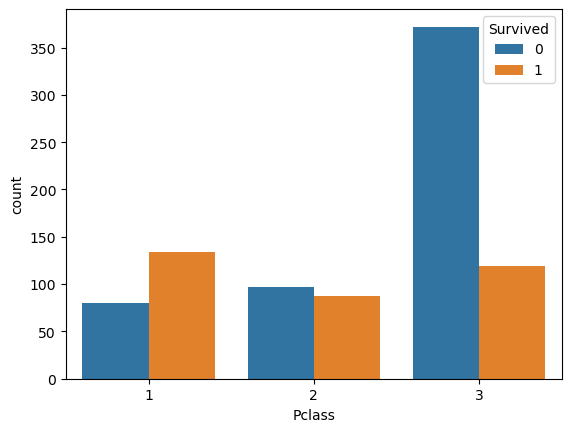

In [19]:
# Plotting number of survivors based on Pclass
sns.countplot(x = 'Pclass', hue = 'Survived', data =data)

## Performing Encoding over Columns

In [20]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
# Coverting columns into Categorical Columns
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace = True)

In [22]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0


## Splitting the new data into Features and Target

In [23]:
X =data.drop(columns = ['PassengerId', 'Ticket','Survived'],axis = 1)
Y=data['Survived']

In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [25]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Splitting the data into Testing and Traning data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 3)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(889, 7) (666, 7) (223, 7)


## Model Training

In [28]:
model=LogisticRegression(max_iter=200)

In [29]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

## Model Evaluation

In [30]:
training_prediction = model.predict(X_train)
training_prediction

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [31]:
# Accuracy of training data
training_accuracy = accuracy_score(Y_train,training_prediction)
print('Accuracy Score of Training data:',training_accuracy)

Accuracy Score of Training data: 0.8213213213213213


In [32]:
testing_prediction = model.predict(X_test)
testing_prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [33]:
# Accuracy of testing data
testing_accuracy = accuracy_score(Y_test,testing_prediction)
print('Accuracy Score of Testing data:',testing_accuracy)

Accuracy Score of Testing data: 0.7623318385650224
